In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
import numpy as np
import math
import matplotlib.patches as mpatches
from statsmodels.stats.multitest import multipletests
from seaborn import pointplot


In [3]:
kunkleFile = 'kunkle_enrichments.cell_type_results.txt'
kunkle_data = pd.read_csv(kunkleFile, sep="\t", header=0)
jansenFile = 'jansen_enrichments.cell_type_results.txt'
jansen_data = pd.read_csv(jansenFile, sep="\t", header=0)

In [4]:
def plotData(data, label):
    data["fdr"] = multipletests(data["Coefficient_P_value"],
                                alpha=0.05,
                                method='fdr_bh')[1]

    data["logfdr"] = [-math.log(val, 10) for val in data["fdr"]]
    
    dims=(10,5)
    fig,ax = plt.subplots(1,2,figsize=dims)

    for i in range(data.shape[0]):
        ax[0].errorbar(x=i, y=data.loc[i,"Coefficient"],
                    yerr=data.loc[i,"Coefficient_std_error"],
                    fmt='o',
                    capsize=5)
    ax[0].set_xticks(range(0, data.shape[0]))
    ax[0].set_xticklabels(data["Name"],rotation=45)
    ax[0].axhline(y=0, c='k', linestyle='--')
    ax[0].set_ylabel("LDSC Coefficient ("+label+" GWAS)", fontsize=10)
    ax[0].set_xlabel("Satpathy scATAC cell type", fontsize=10)
    
    for i in range(data.shape[0]):
        ax[1].bar([i],
            data.loc[i,"logfdr"])

    ax[1].set_xticks(range(0, data.shape[0]))
    ax[1].set_xticklabels(data["Name"],rotation=45)
    ax[1].axhline(y=-np.log10(0.05),c='k', linestyle='--')
    
    ax[1].set_ylabel("LDSC FDR -log10q ("+label+" GWAS)", fontsize=10)
    ax[1].set_xlabel("Satpathy scATAC cell type", fontsize=10)
    ax[1].set_ylim([0,2])

    plt.tight_layout()
    plt.show()

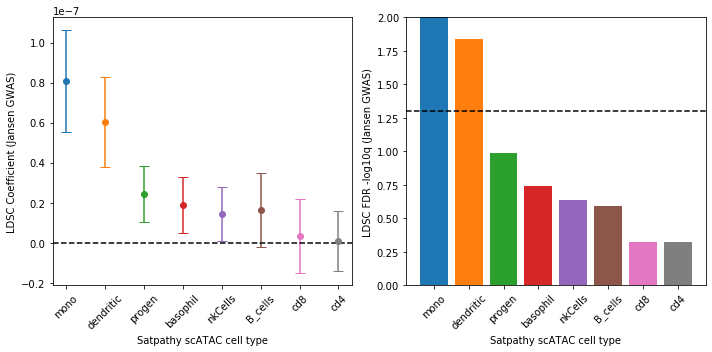

In [5]:
plotData(jansen_data, "Jansen")

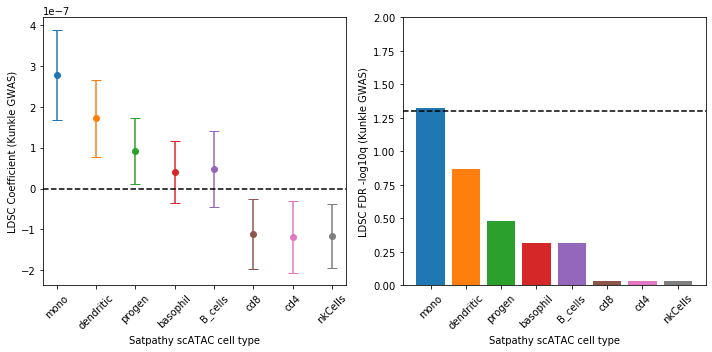

In [6]:
plotData(kunkle_data, "Kunkle")